# K-Nearest Neighbor (KNN)

Handwritten digit recognition
- Each data is a 8X8 (pixel) image of a digit (=64 features)
- Feature values: 0->16 (white -> black)
- There are 10 classes: 0, 1, 2, 3, 4, …, 8, 9 shown in the last column (target variable)
- There are 1,797 examples in total

In [1]:
# import library for data management
import pandas as pd
import numpy as np

In [2]:
# load dataset 'digits.csv'
data = pd.read_csv('digits.csv', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [4]:
data[64].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- Please note that column 0-63 presents the black-and-white value of each pixel. 
- And column 64 is the target variable, which is a digit from 0-9.

In [5]:
# use the 0-63 columns to be X (features) and the 64th column to be y (target variable)
X = data.iloc[:,0:64]
y = data.iloc[:,64]

In [6]:
# import KNeighborsClassifier model from sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.
#KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

In [7]:
# import functions for cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

In [8]:
# try all the values of 'k' from 1 to 13, train the k-Nearest Neighbor classifier 
    # with the each value of 'k'
for k in range(1, 14):
    #default weight = "uniform"
    model = KNeighborsClassifier(n_neighbors=k) 
    model.fit(X, y)
    accuracy = cross_val_score(model,X,y,cv=10).mean()
    print("When k=%d, accuracy=%.3f" % (k, accuracy))

When k=1, accuracy=0.975
When k=2, accuracy=0.974
When k=3, accuracy=0.977
When k=4, accuracy=0.972
When k=5, accuracy=0.971
When k=6, accuracy=0.968
When k=7, accuracy=0.968
When k=8, accuracy=0.965
When k=9, accuracy=0.965
When k=10, accuracy=0.962
When k=11, accuracy=0.964
When k=12, accuracy=0.964
When k=13, accuracy=0.963


In [9]:
# use KNeighborsClassifier(n_neighbors=k, weights='distance') 
    # to see what results you can obtain
for k in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=k, weights='distance')
    model.fit(X, y)
    accuracy = cross_val_score(model,X,y,cv=10).mean()
    print("When k=%d, accuracy=%.3f" % (k, accuracy))

When k=1, accuracy=0.975
When k=2, accuracy=0.975
When k=3, accuracy=0.977
When k=4, accuracy=0.977
When k=5, accuracy=0.971
When k=6, accuracy=0.974
When k=7, accuracy=0.968
When k=8, accuracy=0.967
When k=9, accuracy=0.968
When k=10, accuracy=0.967
When k=11, accuracy=0.967
When k=12, accuracy=0.967
When k=13, accuracy=0.964
When k=14, accuracy=0.965
When k=15, accuracy=0.964
When k=16, accuracy=0.965
When k=17, accuracy=0.963
When k=18, accuracy=0.964
When k=19, accuracy=0.963
When k=20, accuracy=0.962
When k=21, accuracy=0.962
When k=22, accuracy=0.962
When k=23, accuracy=0.962
When k=24, accuracy=0.960
When k=25, accuracy=0.958
When k=26, accuracy=0.959
When k=27, accuracy=0.959
When k=28, accuracy=0.958
When k=29, accuracy=0.957


From the above results, using k = 3 or 4 with distance weight generates the highest accuracy.    

In [10]:
model_best = KNeighborsClassifier(n_neighbors=4,weights='distance')

In [11]:
model_best.fit(X,y)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [12]:
# model evaluation1: cross validation 

y_pred = cross_val_predict(model_best,X,y,cv=10)

In [13]:
y_pred

array([0, 1, 8, ..., 8, 9, 8])

In [14]:
y_pred.shape

(1797,)

### Show performance report

In [15]:
# show a classification report demonstrating the accuracy of the classifier for each digit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# evaluate result
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
print("Accuracy:",cross_val_score(model_best,X,y,cv=10).mean())
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report
print("Classification Report:\n",classification_report(y_pred, y))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("Confusion Matrix:\n", confusion_matrix(y_pred, y))

Accuracy: 0.977191185599007
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       179
           1       0.99      0.94      0.96       192
           2       0.97      0.99      0.98       173
           3       0.96      0.97      0.97       181
           4       0.98      0.99      0.99       179
           5       0.98      0.99      0.98       180
           6       0.99      0.98      0.98       183
           7       0.99      0.99      0.99       180
           8       0.96      0.97      0.96       173
           9       0.95      0.97      0.96       177

    accuracy                           0.98      1797
   macro avg       0.98      0.98      0.98      1797
weighted avg       0.98      0.98      0.98      1797

Confusion Matrix:
 [[178   0   0   0   0   0   1   0   0   0]
 [  0 180   3   0   1   0   1   0   6   1]
 [  0   1 171   1   0   0   0   0   0   0]
 [  0   0   1 176   0   0   0   0   0   4

In [16]:
##  model evaluation2: train test split


# from sklearn.model_selection import train_test_split
# import sklearn.metrics as metrics

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
# metrics.accuracy_score(y_test, y_pred)

### In the next, we show the image of the digit and the prediction.

In [17]:
# we use the iloc function to choose the 23th example
image = X.iloc[22,:]

In [18]:
prediction = model_best.predict([image])[0]

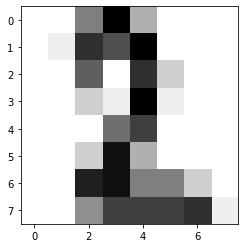

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
imgdata = np.array(image, dtype='float')
# convert the image for a 64-dim array to an 8 x 8 image
pixels = imgdata.reshape((8,8))
plt.imshow(pixels,cmap='binary')

In [20]:
print("KNN thinks tha digit is:", prediction)

KNN thinks tha digit is: 2


**Task: change the command to select the 200th example from the data, reexcecute the commands to show the prediction and the image.**